# Q1. Basic EDA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [16]:
# Load the data
df = pd.read_csv(r"C:\Users\HP\Downloads\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [17]:
# Basic EDA
print(df.head())
print(df.info())
print(df.describe())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk          

In [18]:
# Check for missing values
print(df.isnull().sum())


location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [19]:
# Check the price_per_sqft column specifically
print("\nPrice per sqft statistics:")
print(df['price_per_sqft'].describe())


Price per sqft statistics:
count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64


# Q2. Outlier Detection and Removal

## a) Mean and Standard Deviation Method

In [20]:
# Calculate mean and std
mean = df['price_per_sqft'].mean()
std = df['price_per_sqft'].std()

# Define bounds (typically ±3σ)
lower_bound = mean - 3*std
upper_bound = mean + 3*std

# Identify outliers
outliers_sd = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Remove outliers (trimming)
df_sd = df[(df['price_per_sqft'] >= lower_bound) & (df['price_per_sqft'] <= upper_bound)]

# Alternatively, cap the outliers
df_sd_capped = df.copy()
df_sd_capped['price_per_sqft'] = np.where(df_sd_capped['price_per_sqft'] > upper_bound, upper_bound,
                                         np.where(df_sd_capped['price_per_sqft'] < lower_bound, lower_bound, 
                                                 df_sd_capped['price_per_sqft']))

In [21]:
print(mean)
print(std)
print(outliers_sd )
print(df_sd)

7920.336742424242
106727.16032810845
             location       size  total_sqft  bath  price  bhk  price_per_sqft
345             other  3 Bedroom        11.0   3.0   74.0    3          672727
1106            other  5 Bedroom        24.0   2.0  150.0    5          625000
4044   Sarjapur  Road  4 Bedroom         1.0   4.0  120.0    4        12000000
4924            other      7 BHK         5.0   7.0  115.0    7         2300000
11447      Whitefield  4 Bedroom        60.0   4.0  218.0    4          363333
                       location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                        

## b) Percentile Method

In [22]:
# Define percentiles (typically 5th and 95th)
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)

# Identify outliers
outliers_percentile = df[(df['price_per_sqft'] < lower_percentile) | (df['price_per_sqft'] > upper_percentile)]

# Remove outliers
df_percentile = df[(df['price_per_sqft'] >= lower_percentile) & (df['price_per_sqft'] <= upper_percentile)]

# Alternatively, cap the values
df_percentile_capped = df.copy()
df_percentile_capped['price_per_sqft'] = np.where(df_percentile_capped['price_per_sqft'] > upper_percentile, upper_percentile,
                                                np.where(df_percentile_capped['price_per_sqft'] < lower_percentile, lower_percentile,
                                                        df_percentile_capped['price_per_sqft']))

## c) IQR Method

In [23]:
# Calculate IQR
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_iqr = Q1 - 1.5*IQR
upper_iqr = Q3 + 1.5*IQR

# Identify outliers
outliers_iqr = df[(df['price_per_sqft'] < lower_iqr) | (df['price_per_sqft'] > upper_iqr)]

# Remove outliers
df_iqr = df[(df['price_per_sqft'] >= lower_iqr) & (df['price_per_sqft'] <= upper_iqr)]

# Alternatively, cap the values
df_iqr_capped = df.copy()
df_iqr_capped['price_per_sqft'] = np.where(df_iqr_capped['price_per_sqft'] > upper_iqr, upper_iqr,
                                         np.where(df_iqr_capped['price_per_sqft'] < lower_iqr, lower_iqr,
                                                 df_iqr_capped['price_per_sqft']))

## d) Z-Score Method

In [24]:
# Calculate Z-scores
df['z_score'] = stats.zscore(df['price_per_sqft'])

# Define threshold (typically ±3)
z_threshold = 3

# Identify outliers
outliers_z = df[(df['z_score'] < -z_threshold) | (df['z_score'] > z_threshold)]

# Remove outliers
df_z = df[(df['z_score'] >= -z_threshold) & (df['z_score'] <= z_threshold)].drop('z_score', axis=1)

# Alternatively, cap using z-scores
df_z_capped = df.copy()
df_z_capped['price_per_sqft'] = np.where(df_z_capped['z_score'] > z_threshold, 
                                       df_z_capped['price_per_sqft'].mean() + z_threshold*df_z_capped['price_per_sqft'].std(),
                                       np.where(df_z_capped['z_score'] < -z_threshold,
                                               df_z_capped['price_per_sqft'].mean() - z_threshold*df_z_capped['price_per_sqft'].std(),
                                               df_z_capped['price_per_sqft']))
df_z_capped = df_z_capped.drop('z_score', axis=1)

# Q3. Box Plot Comparison

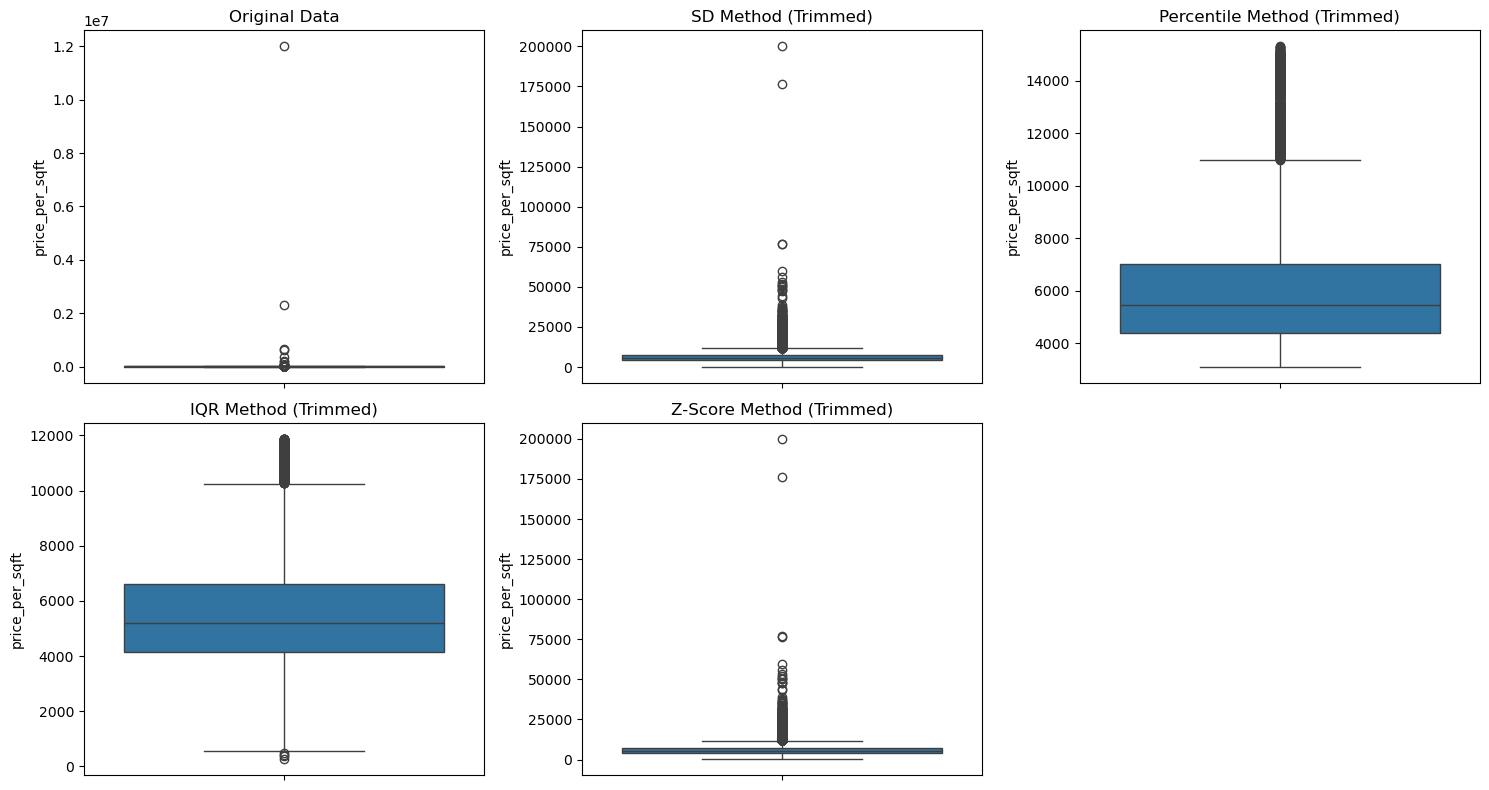

In [25]:
# Create box plots for each method
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, y='price_per_sqft')
plt.title('Original Data')

plt.subplot(2, 3, 2)
sns.boxplot(data=df_sd, y='price_per_sqft')
plt.title('SD Method (Trimmed)')

plt.subplot(2, 3, 3)
sns.boxplot(data=df_percentile, y='price_per_sqft')
plt.title('Percentile Method (Trimmed)')

plt.subplot(2, 3, 4)
sns.boxplot(data=df_iqr, y='price_per_sqft')
plt.title('IQR Method (Trimmed)')

plt.subplot(2, 3, 5)
sns.boxplot(data=df_z, y='price_per_sqft')
plt.title('Z-Score Method (Trimmed)')

plt.tight_layout()
plt.show()

## the IQR method works well for price data as it's robust to non-normal distributions.

# Q4. Normality Check and Transformations


Original Skewness: 108.28, Kurtosis: 12095.22
Transformed Skewness: 1.40, Kurtosis: 9.21


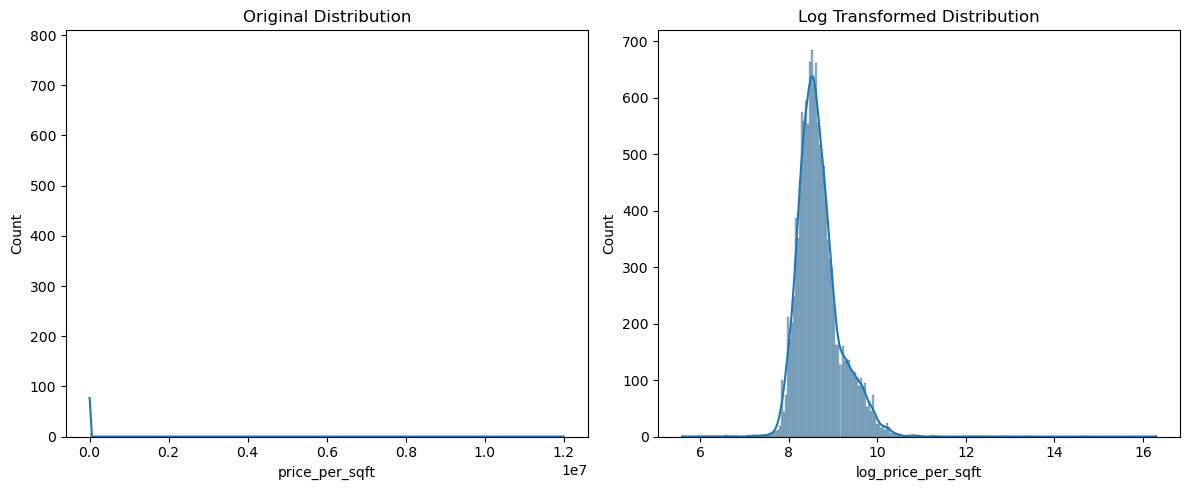

In [27]:
# Check initial distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Original Distribution')

# Calculate skewness and kurtosis
original_skew = df['price_per_sqft'].skew()
original_kurtosis = df['price_per_sqft'].kurtosis()
print(f"Original Skewness: {original_skew:.2f}, Kurtosis: {original_kurtosis:.2f}")

# Apply log transformation
df['log_price_per_sqft'] = np.log1p(df['price_per_sqft'])

plt.subplot(1, 2, 2)
sns.histplot(df['log_price_per_sqft'], kde=True)
plt.title('Log Transformed Distribution')

# Calculate skewness and kurtosis after transformation
transformed_skew = df['log_price_per_sqft'].skew()
transformed_kurtosis = df['log_price_per_sqft'].kurtosis()
print(f"Transformed Skewness: {transformed_skew:.2f}, Kurtosis: {transformed_kurtosis:.2f}")

plt.tight_layout()
plt.show()


# Q5. Correlation Heatmap

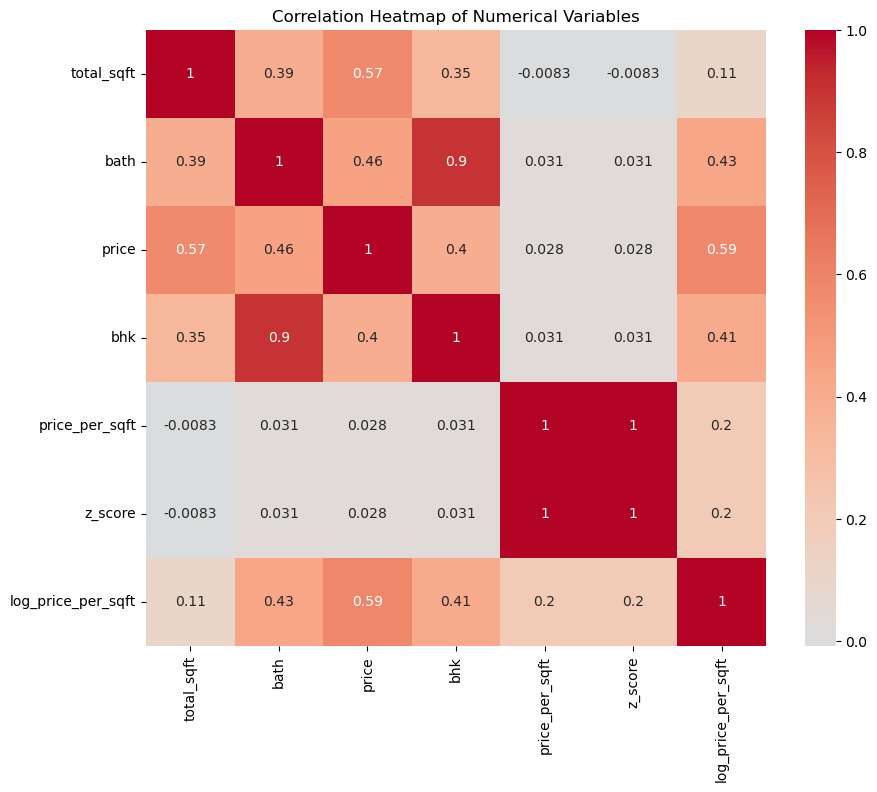

In [28]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns

# Calculate correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

# Q6. Scatter Plots for Correlation

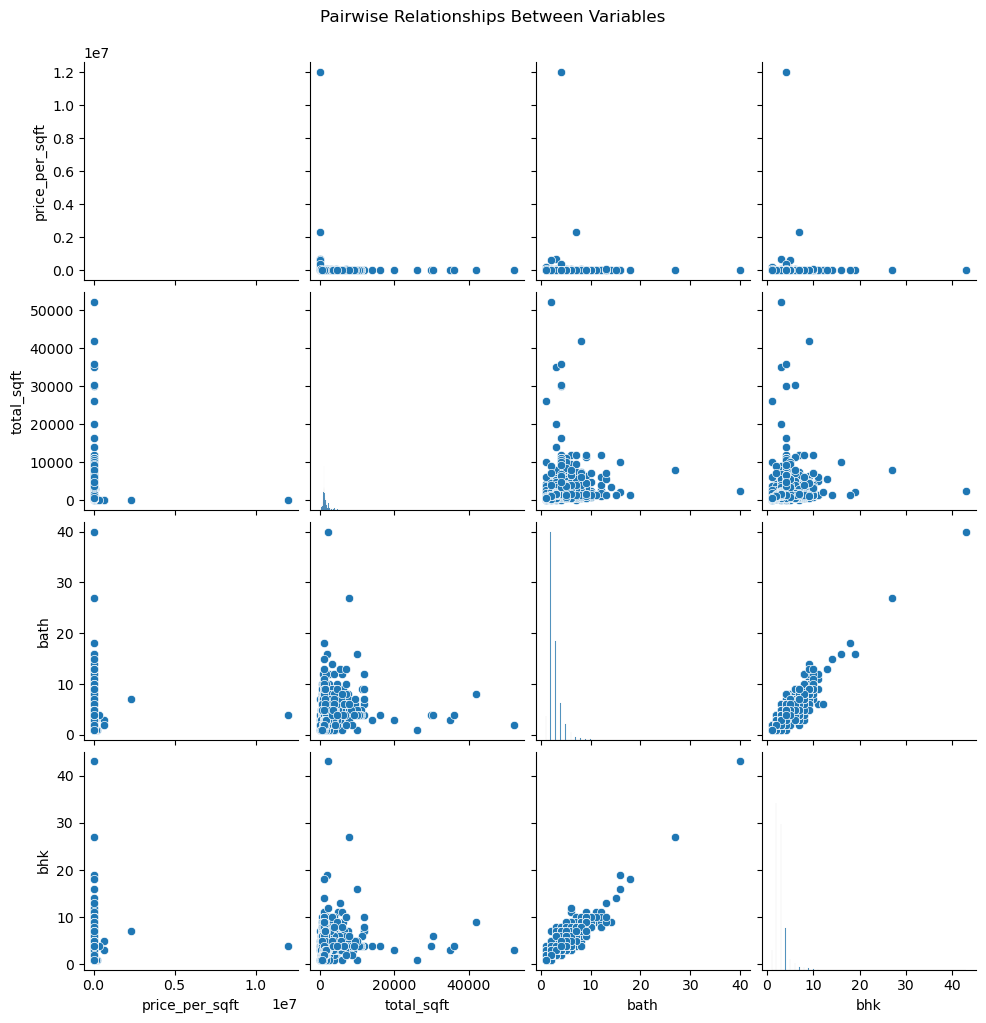

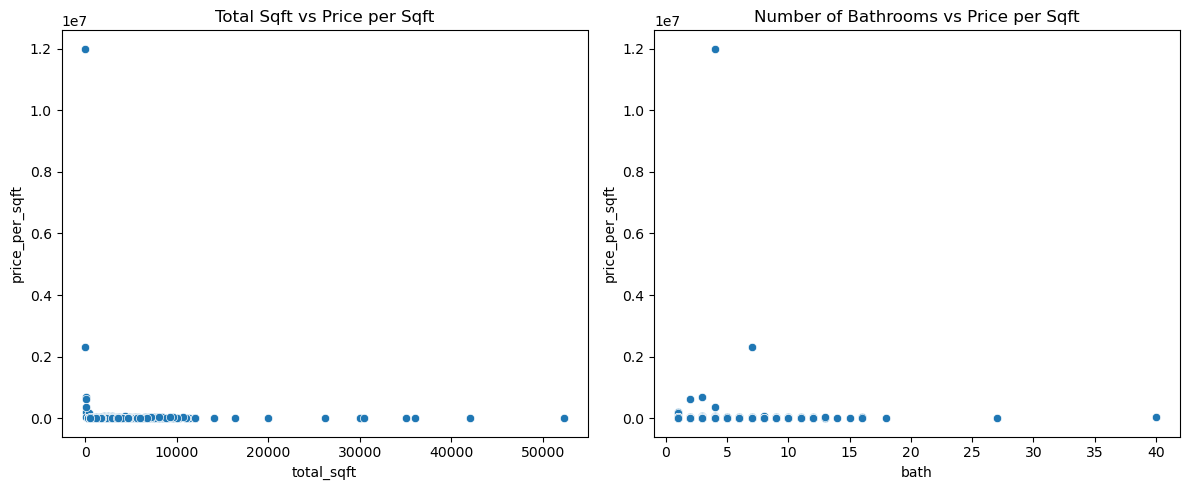

In [31]:
# Create pairplot for key numerical variables
key_columns = ['price_per_sqft', 'total_sqft', 'bath', 'bhk']  # adjust as needed
sns.pairplot(df[key_columns])
plt.suptitle('Pairwise Relationships Between Variables', y=1.02)
plt.show()

# Or individual scatter plots for specific relationships
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='total_sqft', y='price_per_sqft')
plt.title('Total Sqft vs Price per Sqft')

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='bath', y='price_per_sqft')
plt.title('Number of Bathrooms vs Price per Sqft')

plt.tight_layout()
plt.show()